In [35]:
import pandas as pd
from datasets import Dataset
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [10]:
df = pd.read_csv("./datasets/IMDB Dataset.csv")
print(df) 

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [11]:
def remove_special_chars(df, text_column= 'text'):
    # this function takes in input a dataframe and a string containing the text column name
    # and return the dataframe with the text column cleaned from special chars
    df[text_column] = df[text_column].apply(lambda text: re.sub(r"[^a-zA-Z\s]", "", text))
    return df
df = remove_special_chars(df, "review")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [12]:
def remove_stopwords_and_punkt(df, text_column="text", legal_stopwords = False):
    # this function takes in input a dataframe, a string containing the text column name and a list of legal words.
    # the function return a dataframe with the text column cleaned from stopwords and punctualization
    nltk.download('stopwords')
    nltk.download('punkt')
    stop_words = set(stopwords.words('english'))
    
    if not legal_stopwords == False:
        stop_words = stop_words.union(legal_stopwords)
        
    def remove_stop_words(text):
        words = word_tokenize(text.lower())
        clean_words = [word for word in words if word not in stop_words]
        return " ".join(clean_words)
    
    df[text_column] = df[text_column].apply(remove_stop_words)
    
    return df

df = remove_stopwords_and_punkt(df, "review")
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


In [13]:
def lemmatize_text(df, text_column="text"):
    # this function takes in input a dataframe, a string containing the text column name and 
    # return a dataframe with the text column lemmatized
    
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    lemmatizer = WordNetLemmatizer()
    
    def lemmatize(text):
        words = word_tokenize(text.lower())
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return " ".join(lemmatized_words)
    
    df[text_column] = df[text_column].apply(lemmatize)
    
    return df

df = lemmatize_text(df, "review")
df.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comment film looking forwa...,negative
9,like original gut wrenching laughter like movi...,positive


In [14]:
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()

# Function to remove short words
def remove_short_words(text, min_length=3):
    words = word_tokenize(text)
    words_filtered = [word for word in words if len(word) >= min_length]
    return " ".join(words_filtered)

# Function to perform lemmatization
def lemmatize_text(text):
    words = word_tokenize(text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply preprocessing steps
data['review'] = data['review'].apply(remove_short_words)
data['review'] = data['review'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NameError: name 'data' is not defined

In [15]:
def remove_short_text(df, text_column="text", min_length=3):
    # this function takes in input a dataframe, a string containing the text column name and the minimum length
    # of words and return a dataframe with the text column with words more long then min_length param
    
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    lemmatizer = WordNetLemmatizer()
    
    def remove_words(text, min_length=3):
        words = word_tokenize(text)
        words_filtered = [word for word in words if len(word) >= min_length]
        return " ".join(words_filtered)
    
    df[text_column] = df[text_column].apply(lambda text: remove_words(text, min_length))
    
    return df

df = remove_short_text(df, "review")
df.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,sentiment
0,one reviewer mentioned watching episode youll ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comment film looking forwa...,negative
9,like original gut wrenching laughter like movi...,positive


In [16]:
def worldcloud(df, text_column = "text"):
    # take in input a pandas Dataframe and a string that indicate
    # the text column name and return a wordcloud plot
    text_data = df[text_column].dropna().str.cat(sep=' ')
    # Assuming your text data is stored in the variable 'text'
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

def twenty_most_common_words(df, text_column = "text"):
    # take in input a pandas Dataframe and a string that indicate
    # the text column name and return a histogram with the twenty
    # most common words and them occurrences
    df[text_column] = df[text_column].apply(lambda x: str(x))
    all_reviews = ' '.join(df[text_column])
    all_words = all_reviews.split()
    word_counts = Counter(all_words)
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
    word_counts_df = word_counts_df.reset_index().rename(columns={'index': 'word'})
    # Ordina le parole per conteggio in ordine decrescente
    word_counts_df = word_counts_df.sort_values(by='count', ascending=False)
    # Crea un count plot delle prime N parole più comuni
    top_n = 20
    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='word', data=word_counts_df.head(top_n))
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title(f'Top {top_n} Most Common Words')
    plt.show()

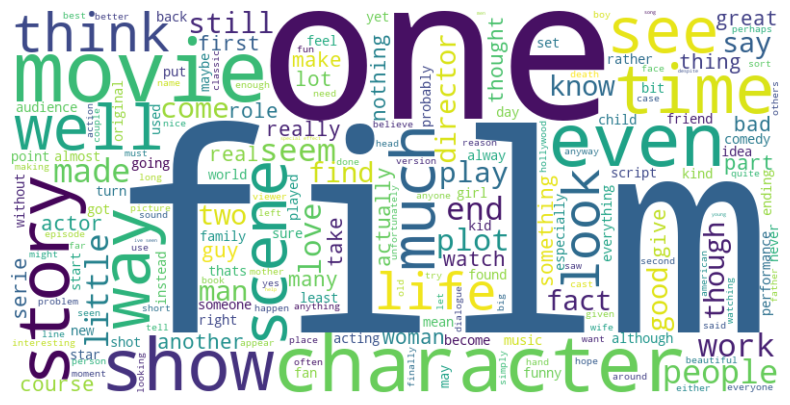

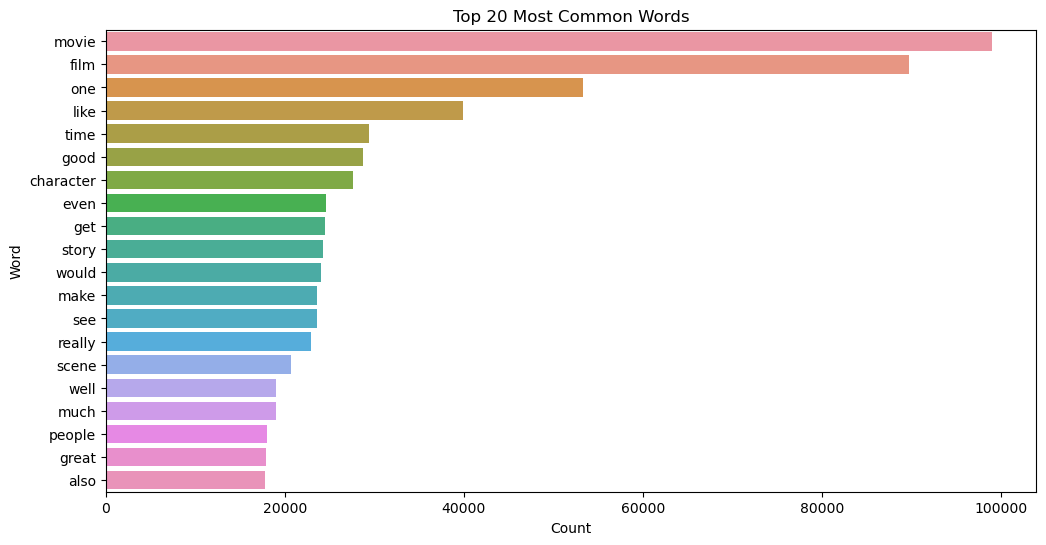

In [17]:
worldcloud(df, "review")
twenty_most_common_words(df, "review")

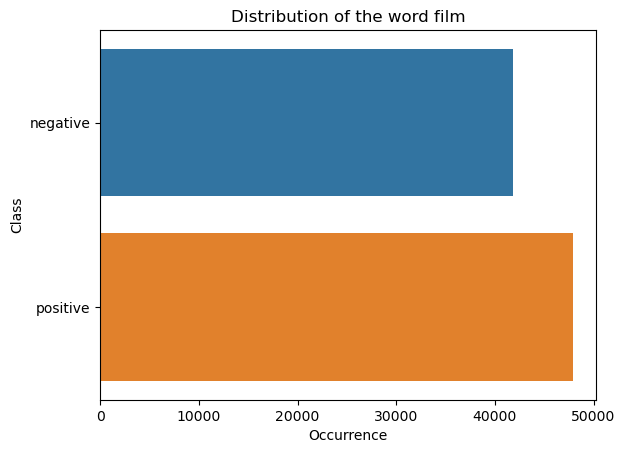

In [18]:
def word_distribution_over_class(df, word, text_column = "text", class_column='class_column'):
    # take in input a pandas Dataframe, a string that indicate
    # the text column name, a word, and return a histogram with 
    # the distribution of the word over the class
    
    def sum_word_occurrences_by_class(df, word, text_column='text_column', class_column='class_column'):
        occurrences_by_class = []

        for class_label, group in df.groupby(class_column):
            total_occurrences = 0
            for text in group[text_column]:
                total_occurrences += text.lower().split().count(word.lower())
            occurrences_by_class.append({'class': class_label, 'occurrence': total_occurrences})

        return pd.DataFrame(occurrences_by_class)
    
    word_occurrences_per_class = sum_word_occurrences_by_class(df, word, text_column, class_column)
    
    
    sns.barplot(y='class', x='occurrence', data=word_occurrences_per_class)
    plt.xlabel('Occurrence')
    plt.ylabel('Class')
    plt.title(f'Distribution of the word {word}')
    plt.show()
    
word_distribution_over_class(df, "film" ,"review", "sentiment")

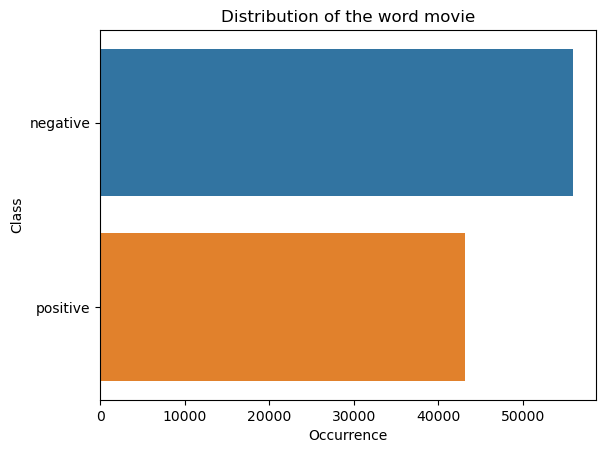

In [19]:
word_distribution_over_class(df, "movie" ,"review", "sentiment")

In [20]:
df = remove_stopwords_and_punkt(df, "review", ["film", "movie"])
df.head(10)

NameError: name 'removing_stopwords_and_punkt' is not defined

In [23]:
# TFIDF feature
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['review'])
y_labels = df['sentiment']

print(X_tfidf)

  (0, 33730)	0.08523046485093606
  (0, 147614)	0.06194084405202953
  (0, 155213)	0.14563851511646203
  (0, 151204)	0.0821807449505313
  (0, 27664)	0.08411317614151176
  (0, 47499)	0.05403390355537593
  (0, 132011)	0.06813002849736792
  (0, 138471)	0.05998420679287169
  (0, 79351)	0.05240617468740013
  (0, 14442)	0.09204698457754183
  (0, 149751)	0.057527335677226246
  (0, 25787)	0.060298704831501466
  (0, 90798)	0.059521644175754784
  (0, 86878)	0.10179108496803378
  (0, 9490)	0.044251607522619404
  (0, 103170)	0.05622104453191322
  (0, 77494)	0.05157297013918276
  (0, 71389)	0.18912994206990388
  (0, 98127)	0.1221858889746552
  (0, 133913)	0.08067904833964941
  (0, 159185)	0.21710826541902195
  (0, 60794)	0.07734386714190498
  (0, 32015)	0.095958750333483
  (0, 71359)	0.0941742208276843
  (0, 59764)	0.0696344776785497
  :	:
  (49999, 81061)	0.09695878213139604
  (49999, 151958)	0.10774282603114181
  (49999, 78352)	0.11516949646940565
  (49999, 124743)	0.11047252053805173
  (49999, 231

In [24]:
# Generating train test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_labels, test_size=0.2, random_state=42)

In [32]:
def chi2_feature_selection(X_train, X_test, y_train, k):
    # this funtion takes in input train samples, test samples, train labels and k (number of features to select)
    # and return the train and test features selected using the chi-square correlation metrics
    chi2_features = SelectKBest(chi2, k = k)
    X_train = chi2_features.fit_transform(X_train, y_train)
    X_test = chi2_features.transform(X_test)
    return X_train, X_test

In [33]:
X_train_fs, X_test_fs = chi2_feature_selection(X_train, X_test, y_train, 10000)

In [36]:
multinomial = MultinomialNB()
bernoulli = BernoulliNB()

multinomial.fit(X_train,y_train)
bernoulli.fit(X_train, y_train)

y_pred_multi = multinomial.predict(X_test)
y_pred_ber = bernoulli.predict(X_test)

print("Classification Repor Multinomial:")
print(classification_report(y_test, y_pred_multi))

print("Classification Repor Bernulli:")
print(classification_report(y_test, y_pred_ber))

multinomial = MultinomialNB()
bernoulli = BernoulliNB()

multinomial.fit(X_train_fs,y_train)
bernoulli.fit(X_train_fs, y_train)

y_pred_multi_fs = multinomial.predict(X_test_fs)
y_pred_ber_fs = bernoulli.predict(X_test_fs)

print("Classification Repor Multinomial fs:")
print(classification_report(y_test, y_pred_multi_fs))

print("Classification Repor Bernulli fs:")
print(classification_report(y_test, y_pred_ber_fs))

Classification Repor Multinomial:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Classification Repor Bernulli:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.88      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Classification Repor Multinomial fs:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.87      4961
    positive       0.87      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87   